In [47]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
import scipy.stats
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings("ignore")

In [2]:
animals_df = pd.read_csv("ANIMALS DATA - final.csv")

## Our variables:

#### Scientific name  - strings

#### Class - 3 classes: ``` Mammalia, Reptalia, Aves.```

#### Order - 60 orders (strings)

#### Family - 252 families (strings)

#### Trend - 3 trends:
```json
    0 - deacrising
    1 - stable
    2 - increasing
```
#### Status - 2 statuses:
```json
    0 - safe animals
    1 - endangered
```
#### Social - 2 options:
```json
    0 - solitary animals
    1 - social animals
```
#### Nocturnal - 2 options:
```json
    0 - day active animals
    1 - nocturnal animals
```
#### Diet - 4 categories:
```json
    0 - all eaters (meats, vegtables, insects ect.)
    1 - carnivores
    2 - vegetarians
    3 - insects eaters
    4 - scavengers (category doesnt left after maping)
```
#### Mating behavior - 2 categories:
```json
    0 - monogamy animals (dyadic relationship)
    1 - polygamy animals (multiple spouses)
```
#### Continuous variable (averages):
```json
    Life Span (by years)
    Length (by cm)
    Weight (by kg)
    Baby Carrying
    Incubation Period (days) 
    Independent Age (by days)
```
#### Continents columns (binomial columns):
```Africa, Antarctica, Asia, Oceania (includes New-Zeland), Central America, Europe, North America, South America.```

#### Climate zones (binomial columns):
```cold, dry/desert, polar/tundra, temperate, tropical.```

In [12]:
animals_df.head(5)

,Unnamed: 0,Scientific Name,Class,Order,Family,Trend,Status,Life Span (years),Length (cm),Weight (kg),...,Europe,Oceania,South America,Central America,North America,Cold,Dry/Desert,Polar/Tundra,Temperate,Tropical
0,0,Canis lupus arctos,mammalia,carnivora,canidae,1,0,12.0,50.0,51.0000,...,0,0,0,0,0,0,0,1,0,0
1,1,Vulpes lagopus,mammalia,carnivora,canidae,1,0,8.5,53.5,5.0000,...,1,0,0,0,0,0,0,1,0,0
2,2,Tamiasciurus hudsonicus,mammalia,rodentia,sciuridae,1,0,7.5,32.5,0.2395,...,0,0,0,0,0,1,1,1,1,0
3,3,Canis lupus,mammalia,carnivora,canidae,1,0,15.0,132.5,38.0000,...,1,0,0,0,0,1,1,1,1,0
4,4,Mustela erminea,mammalia,carnivora,mustelidae,1,0,6.5,247.5,0.2190,...,1,1,0,0,0,1,0,1,1,0


In [4]:
animals_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1548 entries, 0 to 1547
Data columns (total 30 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                1548 non-null   int64  
 1   Scientific Name           1548 non-null   object 
 2   Class                     1548 non-null   object 
 3   Order                     1548 non-null   object 
 4   Family                    1548 non-null   object 
 5   Trend                     1548 non-null   int64  
 6   Status                    1548 non-null   int64  
 7   Life Span (years)         1548 non-null   float64
 8   Length (cm)               1548 non-null   float64
 9   Weight (kg)               1548 non-null   float64
 10  Is Social                 1548 non-null   int64  
 11  Is Nocturnal              1548 non-null   int64  
 12  Diet                      1548 non-null   int64  
 13  Mating Behavior           1548 non-null   int64  
 14  Incubati

In [13]:
animals_df.describe()

,Unnamed: 0,Trend,Status,Life Span (years),Length (cm),Weight (kg),Is Social,Is Nocturnal,Diet,Mating Behavior,...,Europe,Oceania,South America,Central America,North America,Cold,Dry/Desert,Polar/Tundra,Temperate,Tropical
count,1548.000000,1548.000000,1548.000000,1548.000000,1548.000000,1548.00000,1548.000000,1548.000000,1548.000000,1548.000000,...,1548.000000,1548.000000,1548.000000,1548.000000,1548.000000,1548.000000,1548.000000,1548.000000,1548.000000,1548.000000
mean,773.500000,0.689276,0.275194,19.516205,121.031886,396.66103,0.568475,0.339147,1.082041,0.624677,...,0.180879,0.195736,0.014212,0.014212,0.014212,0.189922,0.268088,0.106589,0.627261,0.635013
std,447.013423,0.665690,0.446756,15.592749,183.372173,4690.14026,0.495449,0.473573,0.850332,0.484363,...,0.385042,0.396895,0.118402,0.118402,0.118402,0.392366,0.443107,0.308690,0.483690,0.481582
min,0.000000,0.000000,0.000000,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,386.750000,0.000000,0.000000,10.000000,35.375000,0.30000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,773.500000,1.000000,0.000000,16.000000,67.500000,2.50000,1.000000,0.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
75%,1160.250000,1.000000,1.000000,24.434109,131.375000,12.62500,1.000000,1.000000,2.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000
max,1547.000000,2.000000,1.000000,162.500000,2750.000000,130000.00000,1.000000,1.000000,3.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Categorical variables visualizations and analyzing

### Pie charts (percentage)

Text(0.5, 0.98, 'Trend and Status pie charts')

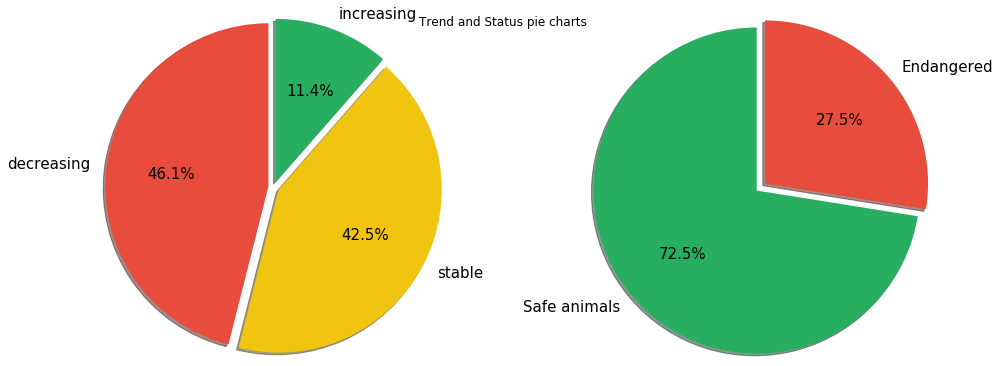

In [25]:
trend_series = animals_df['Trend'].value_counts()
trend_values = trend_series.values.tolist()
trend_index = ['decreasing', 'stable', 'increasing']
trend_colors = ['#E74C3C', '#F1C40F', '#27AE60']

status_series = animals_df['Status'].value_counts()
status_values = status_series.values.tolist()
status_index = ['Safe animals', 'Endangered']
status_colors = ['#27AE60', '#E74C3C']

fig, axs = plt.subplots(1,2, figsize=(16,5))

axs[0].pie(trend_values, labels=trend_index, autopct='%1.1f%%', shadow=True, startangle=90,
           explode=(0.05, 0.05, 0.05), radius=1.5, colors=trend_colors, textprops={'fontsize':15})
axs[1].pie(status_values, labels=status_index, autopct='%1.1f%%', shadow=True,
           startangle=90, explode=(0.05, 0.05), radius=1.5, colors=status_colors, textprops={'fontsize':15})

fig.suptitle('Trend and Status pie charts')

Text(0.5, 0.98, 'Social and Nocturnal animals pie charts')

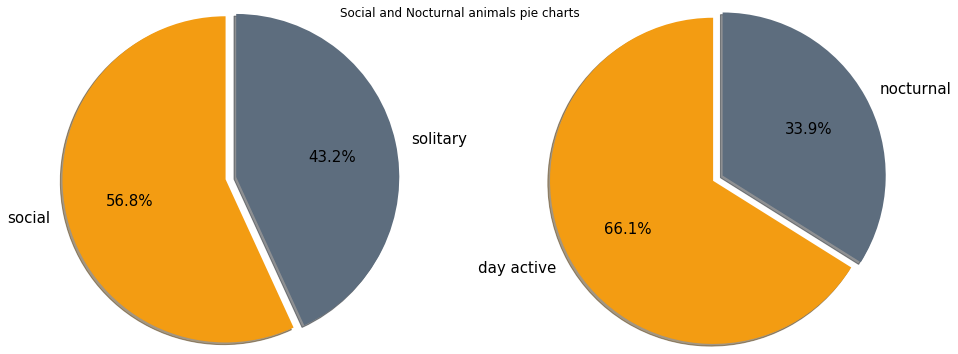

In [6]:
trend_series = animals_df['Is Social'].value_counts()
trend_values = trend_series.values.tolist()
trend_index = ['social', 'solitary']
trend_colors = ['#F39C12', '#5D6D7E']

status_series = animals_df['Is Nocturnal'].value_counts()
status_values = status_series.values.tolist()
status_index = ['day active', 'nocturnal']
status_colors = ['#F39C12', '#5D6D7E']

fig, axs = plt.subplots(1,2, figsize=(16,5))

axs[0].pie(trend_values, labels=trend_index, autopct='%1.1f%%', shadow=True, startangle=90,
           explode=(0.05, 0.05), radius=1.5, colors=trend_colors, textprops={'fontsize':15})
axs[1].pie(status_values, labels=status_index, autopct='%1.1f%%', shadow=True,
           startangle=90, explode=(0.05, 0.05), radius=1.5, colors=status_colors, textprops={'fontsize':15})

fig.suptitle('Social and Nocturnal animals pie charts')

Text(0.5, 0.98, 'Social and Nocturnal animals pie charts')

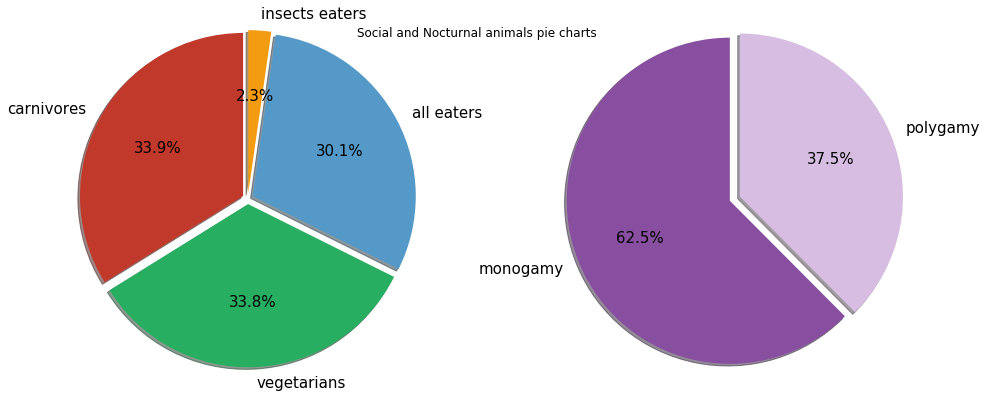

In [18]:
trend_series = animals_df['Diet'].value_counts()
trend_values = trend_series.values.tolist()
trend_index = ['carnivores', 'vegetarians', 'all eaters', 'insects eaters']
trend_colors = ['#C0392B', '#27AE60', '#5499C7', '#F39C12']

status_series = animals_df['Mating Behavior'].value_counts()
status_values = status_series.values.tolist()
status_index = ['monogamy', 'polygamy']
status_colors = ['#884EA0', '#D7BDE2']

fig, axs = plt.subplots(1,2, figsize=(16,5))

axs[0].pie(trend_values, labels=trend_index, autopct='%1.1f%%', shadow=True, startangle=90,
           explode=(0.05, 0.05, 0.05, 0.05), radius=1.5, colors=trend_colors, textprops={'fontsize':15})
axs[1].pie(status_values, labels=status_index, autopct='%1.1f%%', shadow=True,
           startangle=90, explode=(0.05, 0.05), radius=1.5, colors=status_colors, textprops={'fontsize':15})

fig.suptitle('Social and Nocturnal animals pie charts')

### Cross tabulation between different categorical feathers:

#### The correlation between the Status (```0 - safe, 1 - endangred```) and Trend (```0 - deacrising, 1 - stable, 2 - increasing```) columns:
###### As we can see, there is a strong relationship between safe animals and stable and increasing trends variables, and a visible bond between endangered animals and deacresing trend (compared with the other trends).

In [33]:
ct_trend_status = pd.crosstab(animals_df['Trend'], animals_df['Status'], normalize='index')
ct_trend_status

Status,0,1
Trend,,
0,0.509119,0.490881
1,0.883590,0.116410
2,0.887006,0.112994


Text(0, 0.5, 'Status')

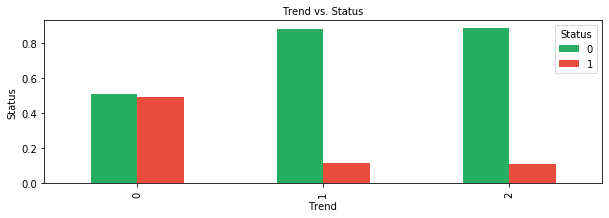

In [76]:
ct_trend_status.plot(kind ='bar', figsize=(10,3), color=['#27AE60', '#E74C3C'])
plt.title('Trend vs. Status', fontsize=10)
plt.xlabel('Trend')
plt.ylabel('Status')

###### We conduct "Chi-Square Test of Independence", while the second value we get is "p-value". if p-value > 0.05 there is a correlation between both variables.

In [75]:
chi2_contingency(ct_trend_status)

(0.5171104454383247,
 0.7721663887441514,
 2,
 array([[0.75990488, 0.24009512],
        [0.75990488, 0.24009512],
        [0.75990488, 0.24009512]]))

#### The correlation between the Status (```0 - safe, 1 - endangred```) and Social (```0 - solitary, 1 - social```) columns:
###### As we can see, social animals are more in danger than solitary animals, that could be because they are more "naive" - are not seem to afraid from other species.

In [82]:
ct_status_social = pd.crosstab(animals_df['Status'], animals_df['Is Social'], normalize='index')
ct_status_social

Is Social,0,1
Status,,
0,0.456328,0.543672
1,0.366197,0.633803


Text(0, 0.5, 'Social')

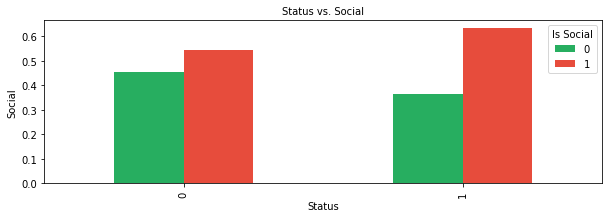

In [83]:
ct_status_social.plot(kind ='bar', figsize=(10,3), color=['#27AE60', '#E74C3C'])
plt.title('Status vs. Social', fontsize=10)
plt.xlabel('Status')
plt.ylabel('Social')

#### The correlation between the Status (```0 - safe, 1 - endangred```) and Social (```0 - solitary, 1 - social```) columns:
###### We dont found a clear conclusion about the ralationship between the day or night activeness and the status.

In [30]:
pd.crosstab(animals_df['Status'], animals_df['Is Nocturnal'], normalize='index')

Is Nocturnal,0,1
Status,,
0,0.661319,0.338681
1,0.659624,0.340376


#### The correlation between the Status (```0 - safe, 1 - endangred```) and Social (```0 - all eaters, 1 - carnivores, 2 - vegetarians, 3 - insects eaters```) columns:
###### The strongest correlation is between the vegetarians and endangred animals. That could be beacose of the damage to the environment (caused by humans).

In [31]:
pd.crosstab(animals_df['Status'], animals_df['Diet'], normalize='index')

Diet,0,1,2,3
Status,,,,
0,0.324421,0.362745,0.287879,0.024955
1,0.239437,0.274648,0.469484,0.016432


#### The correlation between the Status (```0 - safe, 1 - endangered```) and Social (```0 - monogamy, 1 - polygamy```) columns:
###### The strongest correlation is between the polygamy and endangered animals. We didnt found a reason for this.

In [80]:
ct_status_Mating = pd.crosstab(animals_df['Status'], animals_df['Mating Behavior'], normalize='index')
ct_status_Mating

Mating Behavior,0,1
Status,,
0,0.405526,0.594474
1,0.295775,0.704225


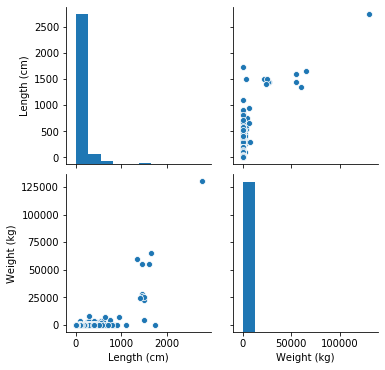

In [81]:
sns.pairplot(animals_df[['Length (cm)', 'Weight (kg)']])

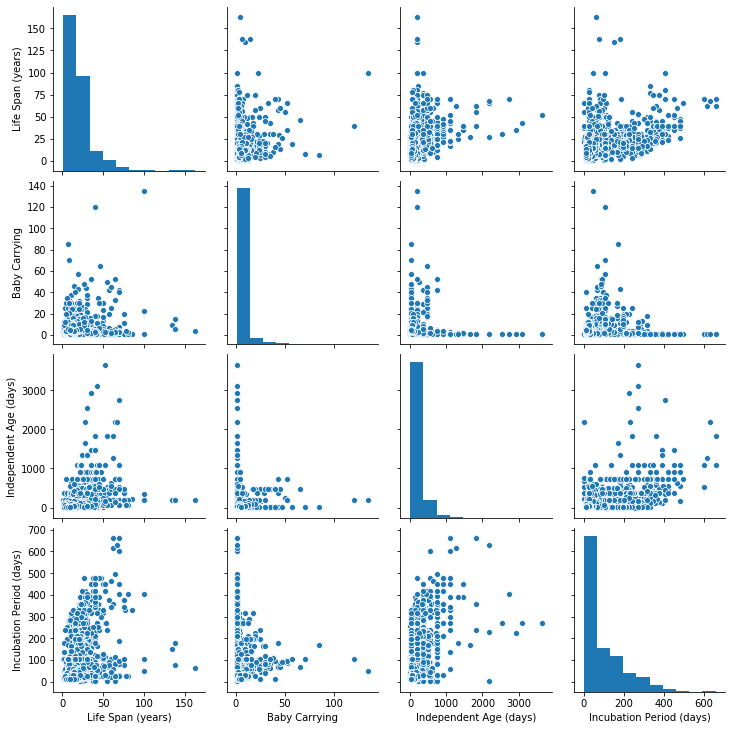

In [21]:
sns.pairplot(animals_df[['Life Span (years)', 'Baby Carrying', 'Independent Age (days)', 'Incubation Period (days)']])

In [71]:
pd.crosstab(animals_df['Oceania'], animals_df['Tropical'], normalize='index')

Tropical,0,1
Oceania,,
0,0.362249,0.637751
1,0.376238,0.623762
